In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import textblob
from textblob import TextBlob
import re
import numpy as np
import time
import seaborn as sns
from wordcloud import WordCloud
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import stop_words


nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='
Companies = ['AMZN', 'GOOG', 'FB','TWTR'] # stock companies

news_tables = {} # Declare empty dictionary to store results from finviz

In [3]:
for company in Companies:
    url = finviz_url + company # so it's going to loop first and get the company and url and then page and then comments from people after it will go back and take another company like GOOG
    req = Request(url=url, headers={'user-agent':'my-app'}) # Specify headers or else access will be denied
    response = urlopen(req)
    soup = BeautifulSoup(response,features='html.parser')
    news_table = soup.find(id='news-table')
    news_tables.update({company:news_table})


print(news_tables)


{'AMZN': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Oct-20-21 05:51AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2021/10/20/3-faang-stocks-with-47-to-55-upside-wall-street/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">3 FAANG Stocks With 47% to 55% Upside, According to Wall Street</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>
<tr><td align="right" width="130">04:09AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/deliveroo-upgrades-full-year-profit-forecast-080945403.html" target="_blank">Deliveroo shares up as it upgrades 

In [4]:
parsed_data = []

for company, news_table in news_tables.items(): # this will go through the keys we created above, company and texts
    for row in news_table.find_all('tr'): # the text in in tr, inorder to get all text we need to write find_all if we say find we will get  only tr
        comment = row.a.text
        date_data = row.td.text.split(' ')
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        parsed_data.append([company,date,time,comment])

        
print(parsed_data)

[['AMZN', 'Oct-20-21', '05:51AM\xa0\xa0', '3 FAANG Stocks With 47% to 55% Upside, According to Wall Street'], ['AMZN', 'Oct-20-21', '04:09AM\xa0\xa0', 'Deliveroo shares up as it upgrades full year profit forecast'], ['AMZN', 'Oct-20-21', '02:51AM\xa0\xa0', "3 Singapore companies ranked among world's best employers"], ['AMZN', 'Oct-20-21', '12:00AM\xa0\xa0', 'Amazon (AMZN) Builds Out Quick-Delivery Network'], ['AMZN', 'Oct-19-21', '11:58PM\xa0\xa0', 'Amazon (AMZN) Builds Quick-Delivery Network'], ['AMZN', 'Oct-19-21', '05:54PM\xa0\xa0', 'Netflix Earnings: What Happened with NFLX'], ['AMZN', 'Oct-19-21', '05:39PM\xa0\xa0', 'Bitcoin-Futures ETF Has a Fine First Day. The Crypto  Isnt Doing So Bad Either.'], ['AMZN', 'Oct-19-21', '05:22PM\xa0\xa0', '"9 Foolish Truths That I Hold to Be Self-Evident"'], ['AMZN', 'Oct-19-21', '05:21PM\xa0\xa0', 'Bellwether acquires South King County affordable units with $25M from Amazon'], ['AMZN', 'Oct-19-21', '04:35PM\xa0\xa0', 'Apollo to Consider More Firm

In [5]:

df = pd.DataFrame(parsed_data, columns=['Company','Date','Time','Comments'])
# Analyse your text
vader = SentimentIntensityAnalyzer()

print(df)

    Company       Date       Time  \
0      AMZN  Oct-20-21  05:51AM     
1      AMZN  Oct-20-21  04:09AM     
2      AMZN  Oct-20-21  02:51AM     
3      AMZN  Oct-20-21  12:00AM     
4      AMZN  Oct-19-21  11:58PM     
..      ...        ...        ...   
395    TWTR  Sep-29-21  12:02PM     
396    TWTR  Sep-29-21  09:00AM     
397    TWTR  Sep-29-21  07:07AM     
398    TWTR  Sep-29-21  07:05AM     
399    TWTR  Sep-28-21  10:54AM     

                                              Comments  
0    3 FAANG Stocks With 47% to 55% Upside, Accordi...  
1    Deliveroo shares up as it upgrades full year p...  
2    3 Singapore companies ranked among world's bes...  
3      Amazon (AMZN) Builds Out Quick-Delivery Network  
4          Amazon (AMZN) Builds Quick-Delivery Network  
..                                                 ...  
395  La Palma volcano lava reaches Atlantic Ocean, ...  
396  YouTube Will Remove Videos With Misinformation...  
397  Rave James Bond Reviews Raise Hopes f

In [6]:
df.describe()

,Company,Date,Time,Comments
count,400,400,400,400
unique,4,22,288,351
top,AMZN,Oct-19-21,10:00AM,Earnings Estimates For Tech Stocks Rise Ahead ...
freq,100,112,6,3


In [7]:
df.head()

,Company,Date,Time,Comments
0,AMZN,Oct-20-21,05:51AM,"3 FAANG Stocks With 47% to 55% Upside, Accordi..."
1,AMZN,Oct-20-21,04:09AM,Deliveroo shares up as it upgrades full year p...
2,AMZN,Oct-20-21,02:51AM,3 Singapore companies ranked among world's bes...
3,AMZN,Oct-20-21,12:00AM,Amazon (AMZN) Builds Out Quick-Delivery Network
4,AMZN,Oct-19-21,11:58PM,Amazon (AMZN) Builds Quick-Delivery Network


In [8]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['Comments'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound =vader.polarity_scores(df['Comments'][i])["compound"]
    pos = vader.polarity_scores(df['Comments'][i])["pos"]
    neu = vader.polarity_scores(df['Comments'][i])["neu"]
    neg = vader.polarity_scores(df['Comments'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [9]:
print(scores)

[{'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0}, {'Compound': 0.6249, 'Positive': 0.389, 'Negative': 0.0, 'Neutral': 0.611}, {'Compound': 0.6369, 'Positive': 0.412, 'Negative': 0.0, 'Neutral': 0.588}, {'Compound': 0.1779, 'Positive': 0.254, 'Negative': 0.0, 'Neutral': 0.746}, {'Compound': 0.1779, 'Positive': 0.298, 'Negative': 0.0, 'Neutral': 0.702}, {'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0}, {'Compound': 0.595, 'Positive': 0.307, 'Negative': 0.0, 'Neutral': 0.693}, {'Compound': 0.1779, 'Positive': 0.257, 'Negative': 0.193, 'Neutral': 0.55}, {'Compound': 0.1779, 'Positive': 0.145, 'Negative': 0.0, 'Neutral': 0.855}, {'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0}, {'Compound': 0.0, 'Positive': 0.0, 'Negative': 0.0, 'Neutral': 1.0}, {'Compound': 0.34, 'Positive': 0.211, 'Negative': 0.0, 'Neutral': 0.789}, {'Compound': 0.1779, 'Positive': 0.159, 'Negative': 0.0, 'Neutral': 0.841}, {'Compound': 0.0, 'Positive': 0.0, 'Negat

In [10]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

,Company,Date,Time,Comments,Compound,Positive,Negative,Neutral
0,AMZN,Oct-20-21,05:51AM,"3 FAANG Stocks With 47% to 55% Upside, Accordi...",0.0000,0.000,0.0,1.000
1,AMZN,Oct-20-21,04:09AM,Deliveroo shares up as it upgrades full year p...,0.6249,0.389,0.0,0.611
2,AMZN,Oct-20-21,02:51AM,3 Singapore companies ranked among world's bes...,0.6369,0.412,0.0,0.588
3,AMZN,Oct-20-21,12:00AM,Amazon (AMZN) Builds Out Quick-Delivery Network,0.1779,0.254,0.0,0.746
4,AMZN,Oct-19-21,11:58PM,Amazon (AMZN) Builds Quick-Delivery Network,0.1779,0.298,0.0,0.702


In [11]:
df

,Company,Date,Time,Comments,Compound,Positive,Negative,Neutral
0,AMZN,Oct-20-21,05:51AM,"3 FAANG Stocks With 47% to 55% Upside, Accordi...",0.0000,0.000,0.000,1.000
1,AMZN,Oct-20-21,04:09AM,Deliveroo shares up as it upgrades full year p...,0.6249,0.389,0.000,0.611
2,AMZN,Oct-20-21,02:51AM,3 Singapore companies ranked among world's bes...,0.6369,0.412,0.000,0.588
3,AMZN,Oct-20-21,12:00AM,Amazon (AMZN) Builds Out Quick-Delivery Network,0.1779,0.254,0.000,0.746
4,AMZN,Oct-19-21,11:58PM,Amazon (AMZN) Builds Quick-Delivery Network,0.1779,0.298,0.000,0.702
...,...,...,...,...,...,...,...,...
395,TWTR,Sep-29-21,12:02PM,"La Palma volcano lava reaches Atlantic Ocean, ...",0.0516,0.074,0.000,0.926
396,TWTR,Sep-29-21,09:00AM,YouTube Will Remove Videos With Misinformation...,-0.3182,0.000,0.223,0.777
397,TWTR,Sep-29-21,07:07AM,Rave James Bond Reviews Raise Hopes for Movieg...,0.4215,0.259,0.000,0.741
398,TWTR,Sep-29-21,07:05AM,Hong Kong Passes Tougher Anti-Doxxing Bill Tha...,0.1779,0.159,0.000,0.841


In [12]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='Company',  values="Neutral", aggfunc = np.mean)
score_table

,Neutral
Company,
AMZN,0.78943
FB,0.86632
GOOG,0.87510
TWTR,0.86183


<AxesSubplot:xlabel='Company'>

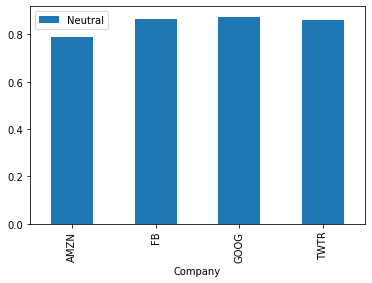

In [13]:
score_table.plot(kind='bar')

In [14]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='Company',  values="Compound", aggfunc = np.mean)
score_table

,Compound
Company,
AMZN,0.189432
FB,0.051635
GOOG,0.126714
TWTR,0.035622


<AxesSubplot:xlabel='Company'>

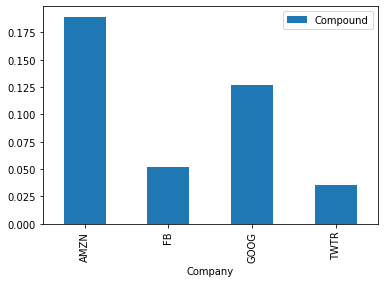

In [15]:
#plotting 
score_table.plot(kind='bar')

In [16]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='Company',  values="Negative", aggfunc = np.mean)
neg_score_table

,Negative
Company,
AMZN,0.03805
FB,0.04856
GOOG,0.02434
TWTR,0.05496


<AxesSubplot:xlabel='Company'>

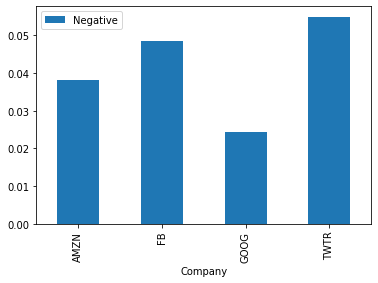

In [17]:
#plotting 
neg_score_table.plot(kind='bar')

<Figure size 432x576 with 0 Axes>

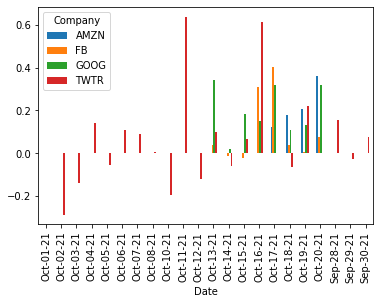

In [18]:
plt.figure(figsize=(6,8))
# Using groupby makes us to have one date entry
mean_df = df.groupby(['Company','Date']).mean()
#print(mean_df)

# Allow us to have date as x-axis
mean_df = mean_df.unstack()
# Remove compound column
mean_df = mean_df.xs('Compound', axis='columns').transpose()
mean_df.plot(kind='bar')
plt.show()
#print(mean_df)

In [19]:
df.Comments.str.split(expand=True).stack().value_counts()

to          156
Facebook     68
in           67
for          56
on           51
           ... 
March         1
Move          1
intense       1
Gates         1
Senate's      1
Length: 1724, dtype: int64

In [20]:
df['Comments']=df['Comments'].str.lower()
df.tail()

,Company,Date,Time,Comments,Compound,Positive,Negative,Neutral
395,TWTR,Sep-29-21,12:02PM,"la palma volcano lava reaches atlantic ocean, ...",0.0516,0.074,0.000,0.926
396,TWTR,Sep-29-21,09:00AM,youtube will remove videos with misinformation...,-0.3182,0.000,0.223,0.777
397,TWTR,Sep-29-21,07:07AM,rave james bond reviews raise hopes for movieg...,0.4215,0.259,0.000,0.741
398,TWTR,Sep-29-21,07:05AM,hong kong passes tougher anti-doxxing bill tha...,0.1779,0.159,0.000,0.841
399,TWTR,Sep-28-21,10:54AM,why twitter shares are falling,0.1531,0.324,0.235,0.441


In [21]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [22]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['Comments'] = df['Comments'].apply(lambda text: cleaning_stopwords(text))
df['Comments'].head()

0    3 faang stocks 47% 55% upside, according wall ...
1    deliveroo shares upgrades full year profit for...
2    3 singapore companies ranked among world's bes...
3          amazon (amzn) builds quick-delivery network
4          amazon (amzn) builds quick-delivery network
Name: Comments, dtype: object

In [23]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(Comments):
    translator = str.maketrans('', '', punctuations_list)
    return Comments.translate(translator)
df['Comments']= df['Comments'].apply(lambda x: cleaning_punctuations(x))
df['Comments'].tail()

395    la palma volcano lava reaches atlantic ocean j...
396         youtube remove videos misinformation vaccine
397    rave james bond reviews raise hopes moviegoing...
398    hong kong passes tougher antidoxxing bill spoo...
399                               twitter shares falling
Name: Comments, dtype: object

In [24]:
def cleaning_repeating_char(Comments):
    return re.sub(r'(.)1+', r'1', Comments)
df['Comments'] = df['Comments'].apply(lambda x: cleaning_repeating_char(x))
df['Comments'].tail()

395    la palma volcano lava reaches atlantic ocean j...
396         youtube remove videos misinformation vaccine
397    rave james bond reviews raise hopes moviegoing...
398    hong kong passes tougher antidoxxing bill spoo...
399                               twitter shares falling
Name: Comments, dtype: object

In [25]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['Comments'] = df['Comments'].apply(lambda x: cleaning_numbers(x))
df['Comments'].tail()

395    la palma volcano lava reaches atlantic ocean j...
396         youtube remove videos misinformation vaccine
397    rave james bond reviews raise hopes moviegoing...
398    hong kong passes tougher antidoxxing bill spoo...
399                               twitter shares falling
Name: Comments, dtype: object

In [26]:
df

,Company,Date,Time,Comments,Compound,Positive,Negative,Neutral
0,AMZN,Oct-20-21,05:51AM,faang stocks upside according wall street,0.0000,0.000,0.000,1.000
1,AMZN,Oct-20-21,04:09AM,deliveroo shares upgrades full year profit for...,0.6249,0.389,0.000,0.611
2,AMZN,Oct-20-21,02:51AM,singapore companies ranked among worlds best ...,0.6369,0.412,0.000,0.588
3,AMZN,Oct-20-21,12:00AM,amazon amzn builds quickdelivery network,0.1779,0.254,0.000,0.746
4,AMZN,Oct-19-21,11:58PM,amazon amzn builds quickdelivery network,0.1779,0.298,0.000,0.702
...,...,...,...,...,...,...,...,...
395,TWTR,Sep-29-21,12:02PM,la palma volcano lava reaches atlantic ocean j...,0.0516,0.074,0.000,0.926
396,TWTR,Sep-29-21,09:00AM,youtube remove videos misinformation vaccine,-0.3182,0.000,0.223,0.777
397,TWTR,Sep-29-21,07:07AM,rave james bond reviews raise hopes moviegoing...,0.4215,0.259,0.000,0.741
398,TWTR,Sep-29-21,07:05AM,hong kong passes tougher antidoxxing bill spoo...,0.1779,0.159,0.000,0.841


In [27]:
# Get independent variables as X
X = df.iloc[: , :-1].values
Y = df.iloc[: , -1].values
#print(Y)
print(X)
# print(df)


[['AMZN' 'Oct-20-21' '05:51AM\xa0\xa0' ... 0.0 0.0 0.0]
 ['AMZN' 'Oct-20-21' '04:09AM\xa0\xa0' ... 0.6249 0.389 0.0]
 ['AMZN' 'Oct-20-21' '02:51AM\xa0\xa0' ... 0.6369 0.412 0.0]
 ...
 ['TWTR' 'Sep-29-21' '07:07AM\xa0\xa0' ... 0.4215 0.259 0.0]
 ['TWTR' 'Sep-29-21' '07:05AM\xa0\xa0' ... 0.1779 0.159 0.0]
 ['TWTR' 'Sep-28-21' '10:54AM\xa0\xa0' ... 0.1531 0.324 0.235]]


In [28]:
# Encoding the independent variables

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np 

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2,3])],remainder='passthrough') # Pass through will not encode the other columns. [3] represents index to encode
X = ct.fit_transform(X).toarray()

print(X)

[[1.     0.     0.     ... 0.     0.     0.    ]
 [1.     0.     0.     ... 0.6249 0.389  0.    ]
 [1.     0.     0.     ... 0.6369 0.412  0.    ]
 ...
 [0.     0.     0.     ... 0.4215 0.259  0.    ]
 [0.     0.     0.     ... 0.1779 0.159  0.    ]
 [0.     0.     0.     ... 0.1531 0.324  0.235 ]]


In [29]:
# Splitting data into Training and Test set
# We need to train data so as to avoid over fitting and under fitting
# We want the results of our Training and Test data to match
# random_state controls the shuffling applied to the data before applying the split
# test_size should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
# print(x_train)
# print(x_test)
# print(y_train)
# print(y_test)

In [30]:
# Trainig the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,max_error,explained_variance_score

regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [31]:
# Testing 
pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
joinedArrays = np.concatenate((pred.reshape(len(pred),1),y_test.reshape(len(y_test),1)),1) # Just 1 column. 0 = vertical axis and 1 = horizontal axis

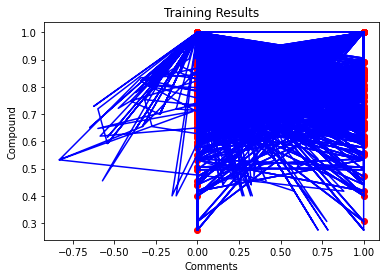

In [32]:
# Visualising training results

plt.scatter(x_train[:,0],y_train, color = 'red')
plt.plot(x_train,regressor.predict(x_train),color = 'blue')
plt.title('Training Results')
plt.xlabel('Comments')
plt.ylabel('Compound')
plt.show() 

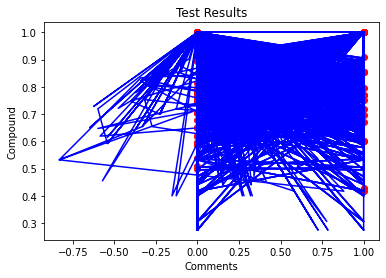

In [33]:
# Visualising test results

plt.scatter(x_test[:,0],y_test, color = 'red')
plt.plot(x_train,regressor.predict(x_train),color = 'blue')
plt.title('Test Results')
plt.xlabel('Comments')
plt.ylabel('Compound')
plt.show()

In [34]:
from sklearn import linear_model

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
model.coef_ # The linear regression coefficient can be accessed in a form of class attribute with model.coef_
model.intercept_ # The y-intercept can be accessed in a form of class attribute with model.intercept_
model.score(X, Y) # How good was your model? You can evaluate your model performance in a form of R-squared, with model.score(X, y). X is the features, and y is the response variable used to fit the model.


1.0

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [36]:
coments_vectorizer = CountVectorizer(max_df = 0.90 , min_df = 2 , max_features = 1000,stop_words = 'english')
comments = coments_vectorizer.fit_transform(df['Comments'])
comments.shape

(400, 474)

In [37]:
df=df.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
F_train, F_test, m_train, m_test = train_test_split(comments, df['Compound'],
                                                    test_size=0.2, random_state=69)

In [38]:
print("F_train_shape : ",F_train.shape)
print("F_test_shape : ",F_test.shape)
print("m_train_shape : ",m_train.shape)
print("m_test_shape : ",m_test.shape)

F_train_shape :  (320, 474)
F_test_shape :  (80, 474)
m_train_shape :  (320,)
m_test_shape :  (80,)


In [39]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(F_train, m_train) 
predicted_naive = model_naive.predict(F_test)

ValueError: Unknown label type: (array([-0.54, -0.54,  0.  ,  0.18, -0.3 ,  0.  ,  0.  ,  0.  ,  0.  ,
       -0.32,  0.18,  0.  ,  0.59,  0.  ,  0.65,  0.  ,  0.  ,  0.48,
       -0.54,  0.  ,  0.86,  0.15,  0.  ,  0.18,  0.4 , -0.48, -0.1 ,
       -0.23,  0.78, -0.13,  0.53,  0.  ,  0.  ,  0.15,  0.88,  0.  ,
        0.34,  0.53,  0.4 ,  0.  ,  0.  ,  0.  ,  0.18,  0.36,  0.  ,
        0.76, -0.34,  0.34, -0.59,  0.2 ,  0.61,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.54,  0.  ,  0.  ,  0.  ,  0.38,  0.18,  0.18,
       -0.57,  0.  ,  0.59,  0.18,  0.  ,  0.1 ,  0.6 ,  0.  ,  0.  ,
        0.18,  0.  , -0.2 ,  0.28,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
       -0.6 ,  0.42, -0.62,  0.4 ,  0.2 , -0.65,  0.2 ,  0.2 ,  0.  ,
        0.32,  0.15, -0.59,  0.64,  0.  , -0.23,  0.  ,  0.  ,  0.48,
       -0.2 ,  0.  ,  0.18,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.15,
        0.71,  0.4 ,  0.18,  0.  ,  0.  ,  0.34,  0.  , -0.1 ,  0.  ,
        0.  ,  0.2 ,  0.49,  0.05,  0.  ,  0.88,  0.15,  0.  ,  0.  ,
        0.18,  0.61,  0.18,  0.27,  0.54,  0.3 ,  0.  ,  0.78,  0.  ,
        0.  ,  0.  ,  0.  ,  0.51,  0.49,  0.  ,  0.4 ,  0.23,  0.  ,
        0.  ,  0.  , -0.13,  0.  ,  0.  ,  0.  ,  0.18, -0.6 ,  0.05,
        0.  ,  0.62,  0.  ,  0.18,  0.  ,  0.53, -0.33,  0.38,  0.72,
        0.  ,  0.  , -0.48,  0.  ,  0.  ,  0.  , -0.51, -0.03,  0.18,
        0.  ,  0.34,  0.34,  0.61,  0.  ,  0.  ,  0.63,  0.61, -0.83,
        0.48,  0.51,  0.  , -0.37,  0.  ,  0.  , -0.3 ,  0.  ,  0.  ,
        0.38,  0.03, -0.32, -0.32,  0.  ,  0.  ,  0.42,  0.  ,  0.  ,
        0.53,  0.  ,  0.  ,  0.  ,  0.51,  0.15,  0.64,  0.  ,  0.  ,
        0.34,  0.  ,  0.  ,  0.3 ,  0.18,  0.  ,  0.  , -0.1 ,  0.2 ,
        0.18,  0.  ,  0.18, -0.01,  0.  ,  0.25,  0.36,  0.  ,  0.62,
        0.  ,  0.  ,  0.  ,  0.34, -0.4 ,  0.  ,  0.15,  0.  ,  0.18,
        0.  ,  0.  ,  0.  ,  0.  , -0.23, -0.38,  0.  ,  0.  ,  0.  ,
        0.51,  0.  , -0.37, -0.4 ,  0.  ,  0.18,  0.08,  0.  ,  0.42,
        0.64,  0.  ,  0.  ,  0.  ,  0.05,  0.27,  0.  ,  0.  ,  0.48,
        0.  ,  0.34,  0.  ,  0.53, -0.27, -0.34,  0.  ,  0.  ,  0.  ,
        0.38,  0.  ,  0.  ,  0.38,  0.49, -0.57,  0.  ,  0.18, -0.05,
        0.51,  0.  , -0.34,  0.  ,  0.  , -0.32,  0.  ,  0.  ,  0.42,
        0.  ,  0.  ,  0.  ,  0.3 ,  0.18, -0.33, -0.32,  0.  ,  0.53,
        0.  ,  0.32,  0.  ,  0.44,  0.  ,  0.  ,  0.4 ,  0.46,  0.64,
        0.38,  0.  , -0.13,  0.79, -0.44,  0.  ,  0.  ,  0.  ,  0.49,
        0.18, -0.08, -0.37,  0.  ,  0.18]),)

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(m_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, m_test)
print("Accuracy with Naive-bayes: ",score_naive)